In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [2]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc
from BBP_RTQC_global_vars import *

import pandas as pd

In [3]:
def robstd(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [4]:
# find all pickled results
fn_pkl = glob.glob("plots/*/*pkl")

all_PROFS = []
for fn in fn_pkl:
    print(fn)
    infile = open(fn,'rb')
    tmp_all_PROFS = pickle.load(infile)
    infile.close()
    
    all_PROFS.extend(tmp_all_PROFS)


plots/5905376/aoml_BD5905376.pkl
plots/6903093/coriolis_BR6903093.pkl
plots/2902120/incois_BR2902120.pkl
plots/5906296/aoml_BR5906296.pkl
plots/5906031/aoml_BR5906031.pkl
plots/6903550/coriolis_BR6903550.pkl
plots/6902743/coriolis_BD6902743.pkl
plots/2902114/incois_BD2902114.pkl
plots/6901649/coriolis_BD6901649.pkl
plots/6901656/coriolis_BR6901656.pkl
plots/6901511/coriolis_BD6901511.pkl
plots/6901866/coriolis_BD6901866.pkl
plots/6903570/coriolis_BR6903570.pkl
plots/5906307/aoml_BR5906307.pkl
plots/6901183/bodc_BR6901183.pkl
plots/7900561/coriolis_BR7900561.pkl
plots/2902753/csio_BR2902753.pkl
plots/5906226/aoml_BR5906226.pkl
plots/2902241/incois_BR2902241.pkl
plots/6901860/coriolis_BR6901860.pkl
plots/5904671/aoml_BD5904671.pkl
plots/6901580/coriolis_BD6901580.pkl
plots/6902549/coriolis_BR6902549.pkl
plots/2902205/incois_BR2902205.pkl
plots/2902195/incois_BR2902195.pkl
plots/5904478/aoml_BD5904478.pkl
plots/5904858/aoml_BD5904858.pkl
plots/4903625/aoml_BR4903625.pkl
plots/5906006/aoml

plots/5904470/aoml_BD5904470.pkl
plots/2902089/incois_BR2902089.pkl
plots/6902024/coriolis_BR6902024.pkl
plots/5906244/aoml_BR5906244.pkl
plots/5906294/aoml_BR5906294.pkl
plots/2902093/incois_BR2902093.pkl
plots/6904117/coriolis_BR6904117.pkl
plots/2902209/incois_BR2902209.pkl
plots/2902088/incois_BR2902088.pkl
plots/6901480/coriolis_BD6901480.pkl
plots/6902544/coriolis_BR6902544.pkl
plots/5904857/aoml_BD5904857.pkl
plots/6903577/coriolis_BR6903577.pkl
plots/2902115/incois_BR2902115.pkl
plots/5905636/aoml_BD5905636.pkl
plots/6902826/coriolis_BR6902826.pkl
plots/5906293/aoml_BR5906293.pkl
plots/2902272/incois_BR2902272.pkl
plots/5905988/aoml_BR5905988.pkl
plots/5905104/aoml_BR5905104.pkl
plots/2902299/incois_BR2902299.pkl
plots/5906310/aoml_BR5906310.pkl
plots/6903551/coriolis_BD6903551.pkl
plots/6901657/coriolis_BD6901657.pkl
plots/5905981/aoml_BD5905981.pkl
plots/6901764/coriolis_BD6901764.pkl
plots/5904767/aoml_BD5904767.pkl
plots/2902264/incois_BR2902264.pkl
plots/3902120/coriolis_B

plots/5904859/aoml_BR5904859.pkl
plots/6901768/coriolis_BD6901768.pkl
plots/6901515/coriolis_BD6901515.pkl
plots/5906623/csiro_BR5906623.pkl
plots/5905135/aoml_BR5905135.pkl
plots/5906339/aoml_BR5906339.pkl
plots/6901862/coriolis_BD6901862.pkl
plots/6901772/coriolis_BR6901772.pkl
plots/5904882/csiro_BD5904882.pkl
plots/6902896/coriolis_BR6902896.pkl
plots/5906343/aoml_BR5906343.pkl
plots/5905134/aoml_BR5905134.pkl
plots/7900559/coriolis_BR7900559.pkl
plots/4901804/coriolis_BD4901804.pkl
plots/6901491/coriolis_BD6901491.pkl
plots/5905994/aoml_BR5905994.pkl
plots/5906319/aoml_BR5906319.pkl
plots/5906208/aoml_BR5906208.pkl
plots/5905133/aoml_BD5905133.pkl
plots/6903024/coriolis_BR6903024.pkl
plots/6901767/coriolis_BD6901767.pkl
plots/2902087/incois_BD2902087.pkl
plots/6902742/coriolis_BR6902742.pkl
plots/6901522/coriolis_BD6901522.pkl
plots/5904182/aoml_BD5904182.pkl
plots/3902125/coriolis_BR3902125.pkl
plots/6902019/coriolis_BR6902019.pkl
plots/5905229/jma_BR5905229.pkl
plots/2902175/inc

In [5]:
# extract all profiles from list of dictionaries (https://stackoverflow.com/questions/7271482/getting-a-list-of-values-from-a-list-of-dicts) 

a = [d.get("PRES", "NaN") for d in all_PROFS if 'PRES' in d]
all_PRES = np.asarray(np.hstack(a))

a = [d.get("BBP700", "NaN") for d in all_PROFS if 'BBP700' in d]
all_BBP700 = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_flag", "NaN") for d in all_PROFS if 'BBP700_QC_flag' in d]
all_BBP700_QC_flag = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_1st_failed_test", "NaN") for d in all_PROFS ]#if 'BBP700_QC_1st_failed_test' in d]
all_BBP700_1st_fail = np.asarray(np.hstack(a))

all_fail = dict.fromkeys(tests.keys())
for ikey in all_fail.keys():
    a = [d.get(ikey, "NaN") for d in all_BBP700_1st_fail if ikey in d]
    all_fail[ikey] = np.asarray(np.hstack(a))


In [6]:
all_WMO = [];
all_LAT = [];
all_LON = [];
all_SENSOR_MODEL = [];
all_SENSOR_MAKER = [];
all_SENSOR_SERIAL_NO = [];

iprof = 0
iTotNoProf = 0
for prof in all_PROFS:
    if "iWMO" in prof: # this is the last record of this float
        all_WMO.extend([ prof['iWMO'] ]*iprof)
        all_SENSOR_MODEL.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_SENSOR_MAKER.extend([ prof['SENSOR_MODEL'] ]*iprof)
        all_SENSOR_SERIAL_NO.extend([ prof['SENSOR_MODEL'] ]*iprof)
        iprof = 0
    else:
        all_LAT.extend([ prof['LAT'] ]*len(prof['PRES']))
        all_LON.extend([ prof['LON'] ]*len(prof['PRES']))
        iprof = iprof + len(prof['PRES']) # this is to count how many BBP values there are for each profile

all_WMO = np.asarray(all_WMO)   
all_SENSOR_MODEL = np.asarray(all_SENSOR_MODEL)   
all_SENSOR_MAKER = np.asarray(all_SENSOR_MODEL)   
all_SENSOR_SERIAL_NO = np.asarray(all_SENSOR_MODEL)   
all_LAT = np.asarray(all_LAT) 
all_LON = np.asarray(all_LON) 

In [7]:
# extract some stats
TotNoFloats = np.unique(all_WMO).shape[0]
TotNoProfiles = np.unique(all_LAT).shape[0]

In [8]:
# extract float parameters and create arrays that match the profile lengths

# for iprof,tmp  in enumerate(all_PROFS):
#     print(tmp.keys())



In [9]:
iQCge3 = np.where(all_BBP700_QC_flag>=3)[0]
iQCle2 = np.where(all_BBP700_QC_flag<=2)[0]

# # find indices of flagged points
iA = np.where(all_fail['A'][iQCge3]!='0')[0] # Global range
iA2 = np.where(all_fail['A2'][iQCge3]!='0')[0] # Global range
iB = np.where(all_fail['B'][iQCge3]!='0')[0] # Noisy
iC = np.where(all_fail['C'][iQCge3]!='0')[0] # High deep values
iD = np.where(all_fail['D'][iQCge3]!='0')[0] # Surface hook 
iE = np.where(all_fail['E'][iQCge3]!='0')[0] # Missing values
iF = np.where(all_fail['F'][iQCge3]!='0')[0] # Negative non-surface
iG = np.where(all_fail['G'][iQCge3]!='0')[0] # Parking hook

iall = np.asarray(np.hstack([iA, iA2, iB, iC, iD, iE, iF, iG]))


itot = all_BBP700.size


In [10]:
# print(len(iA)/itot, len(iB)/itot, len(iC)/itot, len(iD)/itot, len(iE)/itot, len(iF)/itot, len(iG)/itot, (itot - len(iQCge3))/itot, len(iQCle2)/itot)
# print([len(all_BBP700_QC_flag), len(all_BBP700_1st_fail)])
from tabulate import tabulate
print(tabulate([
                [tests['A'], len(iA)/itot*100], 
                [tests['A2'], len(iA2)/itot*100], 
                [tests['B'], len(iB)/itot*100], 
                [tests['C'], len(iC)/itot*100], 
                [tests['D'], len(iD)/itot*100], 
                [tests['E'], len(iE)/itot*100], 
                [tests['F'], len(iF)/itot*100], 
                [tests['G'], len(iG)/itot*100 ],
                ['QC<=2',    len(iQCle2)/itot*100 ],                
                ['QC>=3',    len(iQCge3)/itot*100 ],
                ['--------------------', ],
                ['Tot no of records', itot ],
                ['Tot no of profiles', TotNoProfiles ],
                ['Tot no of floats', TotNoFloats ],
                ], 
                headers=['Test', '%']
                ))

Test                                                 %
-------------------------------------  ---------------
Global Range                                1.98418
Global Range negative medfilt1 values       1.05581
Noisy Profile                               1.74662
High-Deep Value                             6.61033
Surface Hook                                0.0454501
Missing Data                                4.10725
Negative non-surface                        0.548387
Parking Hook                                0.342246
QC<=2                                      87.191
QC>=3                                      12.809
--------------------
Tot no of records                           3.1122e+07
Tot no of profiles                     132462
Tot no of floats                          616


In [11]:
# # %matplotlib widget
iN = 100#int(iall.size/3.) # step size to make plotting faster
# fig = plt.figure(figsize=(20,10))
# xmin = 0.0001
# xmax = 0.1
# xoff = 0.0003
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[:][::iN] + xoff, all_PRES[:][::iN], 'ro', ms=3, mfc='r', alpha=0.3)
# ax1.plot(all_BBP700[iQCle2][::iN] + xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.03)
# ax1.plot((xoff, xoff), (-50, 2000), 'k--')
# ax1.set_ylim([-50, 2000])
# # ax1.set_xlim([-0.0003, 0.1])
# ax1.set_xlim([xmin, xmax])
# ax1.invert_yaxis()
# ax1.set_xscale('log')
# ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
# ax1.set_ylabel('PRES [dbars]', fontweight='bold')
# xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1])+xoff)
# xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
# plt.xticks(xts, xtklbls)
# plt.rcParams.update({'font.size': 20})


# gc.collect()
    

In [12]:
def plot_iQC(x1, x2, y1, y2, test):


    # %matplotlib widget
    fig = plt.figure(figsize=(20,10))
    xmin = 0.0001
    xmax = 0.1
    xoff = 0.0003
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(x1 + xoff, y1, 'o', ms=3, alpha=0.03, color='b')
    ax1.plot(x2 + xoff, y2, 'ro', ms=3, alpha=0.03)

    ax1.plot((xoff, xoff), (-50, 2000), 'k--')

    ax1.set_ylim([-50, 2000])
    # ax1.set_xlim([-0.0003, 0.1])
    ax1.set_xlim([xmin, xmax])
    ax1.invert_yaxis()
    ax1.set_xscale('log')
    ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
    ax1.set_ylabel('PRES [dbars]', fontweight='bold')
    xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1]) + xoff)
    xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
    plt.xticks(xts, xtklbls)
    plt.rcParams.update({'font.size': 20})
    plt.title(test)
    gc.collect()


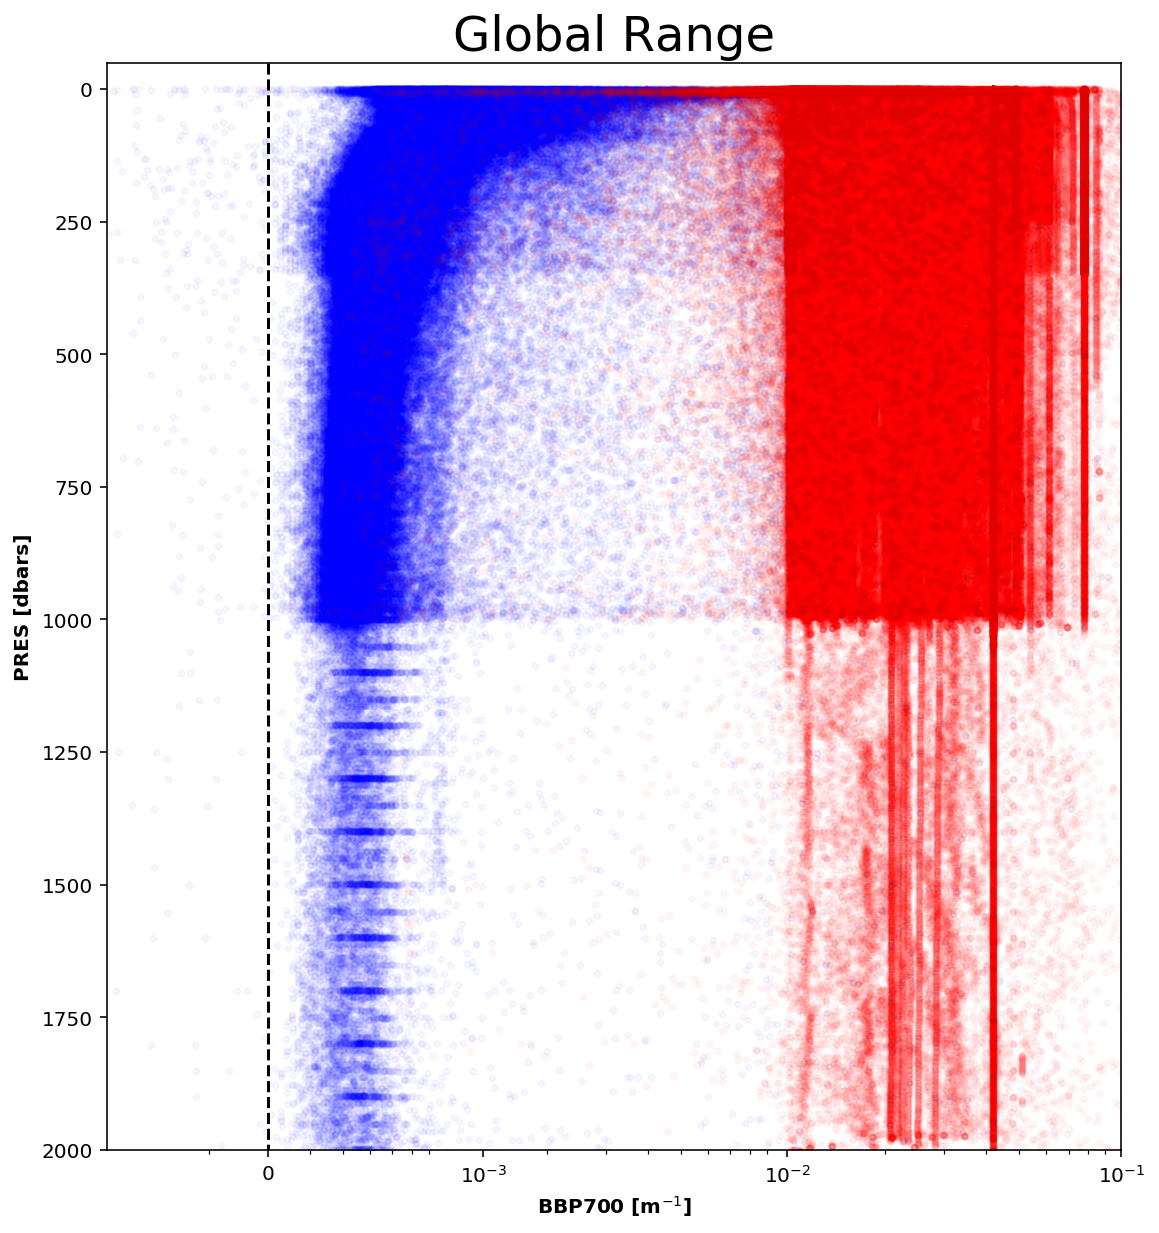

In [13]:
# plots results for Global range test (A)

x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA][::]
plot_iQC(x1, x2, y1, y2, tests['A'])

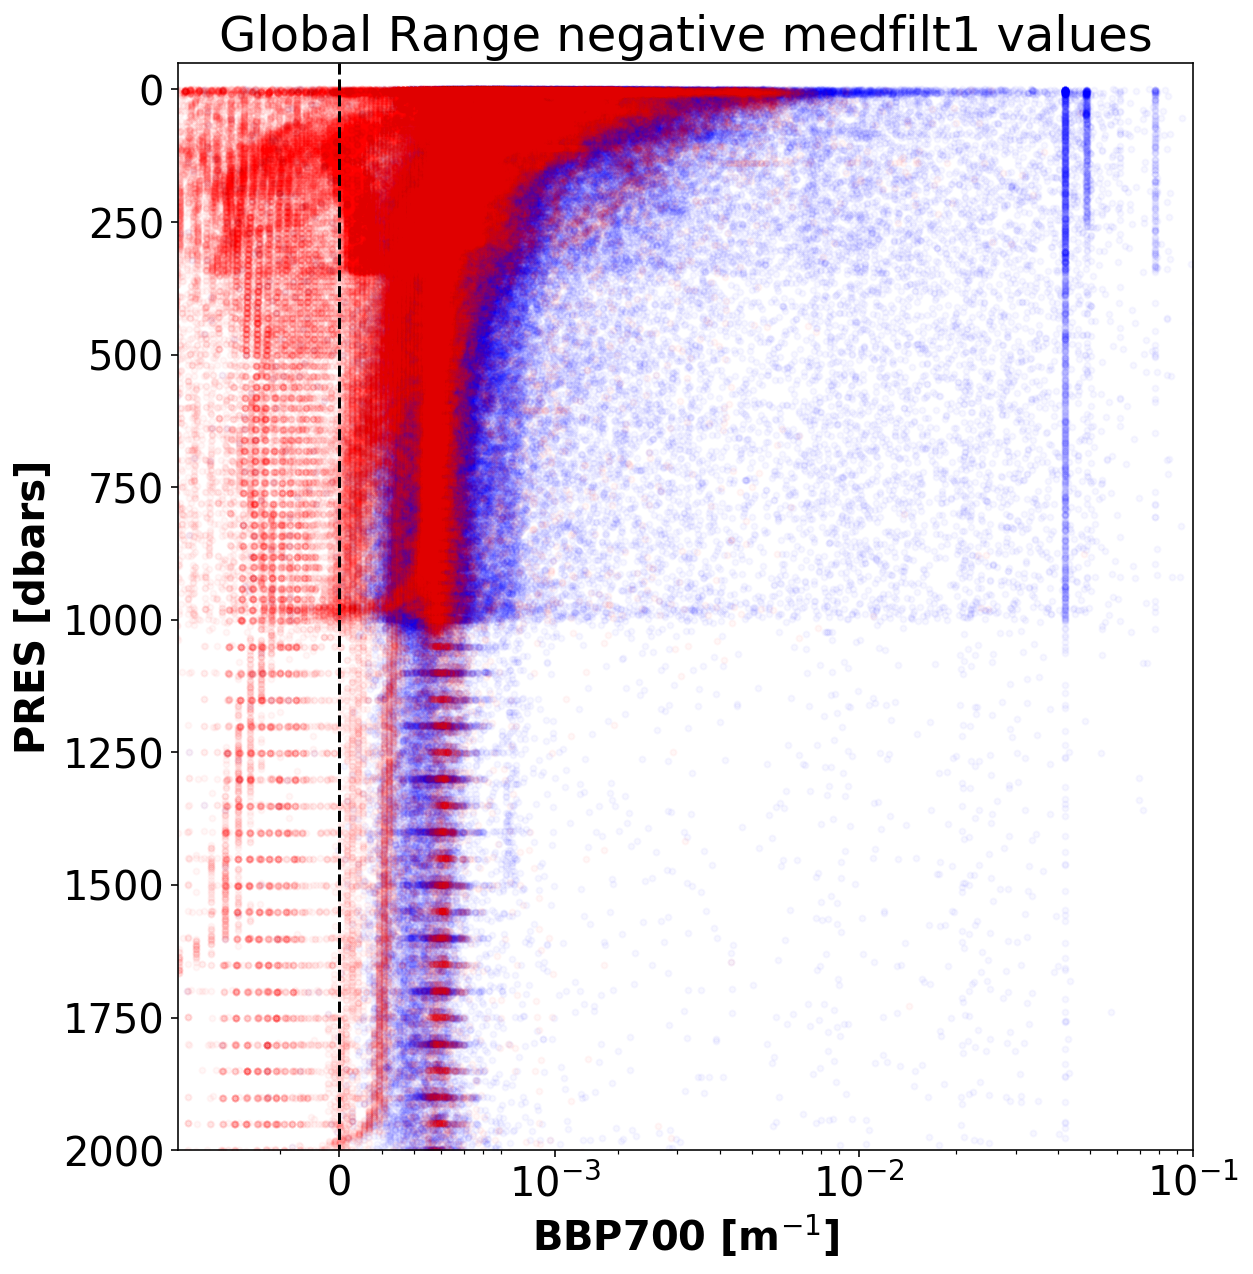

In [14]:
# plots results for Global range test (A)

x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA2][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA2][::]
plot_iQC(x1, x2, y1, y2, tests['A2'])

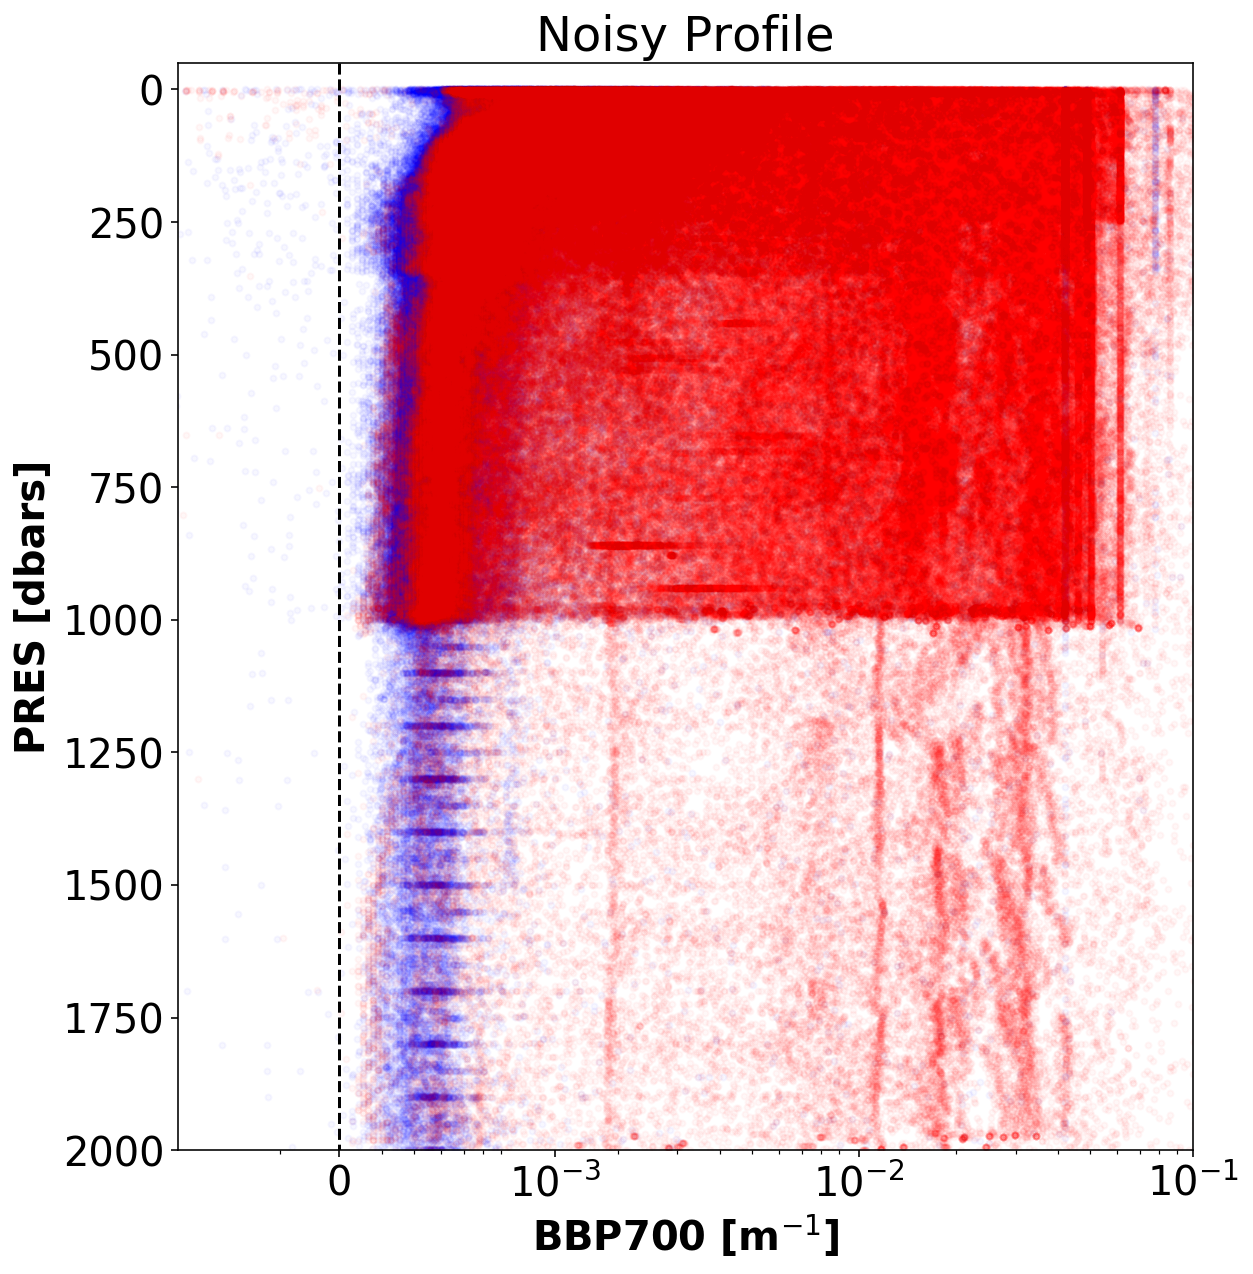

In [15]:
# plots results for test (B)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iB][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iB][::]
plot_iQC(x1, x2, y1, y2, tests['B'])

In [ ]:
# plots results for test (C)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iC][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iC][::]
plot_iQC(x1, x2, y1, y2, tests['C'])

In [ ]:
# plots results for test (D)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iD][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iD][::]
plot_iQC(x1, x2, y1, y2, tests['D'])

In [ ]:
# plots results for test (E)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iE][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iE][::]
plot_iQC(x1, x2, y1, y2, tests['E'])

In [ ]:
# plots results for test (F)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iF][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iF][::]
plot_iQC(x1, x2, y1, y2, tests['F'])

In [ ]:
# plots results for test (G)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iG][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iG][::]
plot_iQC(x1, x2, y1, y2, tests['G'])

In [ ]:
iN = 10# 
iTmax = 100000
#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.01
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[iQCge3][::iN]+xoff, all_PRES[iQCge3][::iN], 'ro', ms=3, alpha=0.2, zorder=60) # this is to add the data that were flagged QC>=3
ax1.plot(all_BBP700[iQCle2][::iN]+xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.04, zorder=60) # this is to plot every iN data point
# ax1.plot(all_BBP700[iQCle2][:iTmax]+xoff, all_PRES[iQCle2][:iTmax], 'ko', ms=3, alpha=0.06, zorder=60) # this is to plot only some floats
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})
plt.title('QC<=2', fontweight='bold')

gc.collect()
    

In [ ]:
iN = 10# 
iTmax = 100000
#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.01
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
# ax1.plot(all_BBP700[iQCge3][::iN]+xoff, all_PRES[iQCge3][::iN], 'ro', ms=3, alpha=0.2, zorder=60) # this is to add the data that were flagged QC>=3
ax1.plot(all_BBP700[:][::iN]+xoff, all_PRES[:][::iN], 'ko', ms=3, alpha=0.04, zorder=60) # this is to plot every iN data point
# ax1.plot(all_BBP700[iQCle2][:iTmax]+xoff, all_PRES[iQCle2][:iTmax], 'ko', ms=3, alpha=0.06, zorder=60) # this is to plot only some floats
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})
plt.title('All', fontweight='bold')

gc.collect()
    

In [ ]:
# this is to plot profiles from one DAC vs the entire dataset
DAC = 'coriolis'
iDAC = np.where(pd.Series(all_WMO[iQCle2]).str.contains(DAC).values)[0] # select data from given DAC
iN = 100# %matplotlib widget
#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.01
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_BBP700[iQCle2][::iN]+xoff, all_PRES[iQCle2][::iN], 'o', color='grey', ms=3, alpha=0.1, zorder=1) # this is to plot every iN data point
iNdac = iN # this is if one wants to see more or less points from the DAC
ax1.plot(all_BBP700[iQCle2][iDAC][::iNdac]+xoff, all_PRES[iQCle2][iDAC][::iNdac], 'o', color='k', ms=3, alpha=0.1, zorder=60) # this is to plot only some floats
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})
plt.title(DAC)

gc.collect()
    

In [ ]:
i500 = np.where((all_PRES[iQCle2]<=550) & (all_PRES[iQCle2]>=450))
plt.hist(all_BBP700[iQCle2][i500], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][i500]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][i500][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


In [ ]:
iLT1000 = np.where((all_PRES[iQCle2]<=1000) & (all_PRES[iQCle2]>=900))
plt.hist(all_BBP700[iQCle2][iLT1000], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iLT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iLT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


In [ ]:

iGT1000 = np.where((all_PRES[iQCle2]>=1000))
plt.hist(all_BBP700[iQCle2][iGT1000], bins=np.logspace(-4,-3, 50));
# plt.gca().set_xticklabels([1e-4, 2e-4, 4e-4, 6e-4, 8e-4, 10e-4], fontsize=20)

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iGT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iGT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)

In [ ]:
# for icode in tests:
#     # create dir with plots 
#     !mkdir -p {DIR_PLOTS + "Tests/" + icode + "/"}
    
#     # delete old files
#     oldB = glob.glob(DIR_PLOTS + "Tests/" + icode + "/*png")
#     [os.remove(i) for i in oldB] ;
    
#     # copy specific-test plots in dir for each test
#     fn = glob.glob(DIR_PLOTS + "[0-9]*/*_" + icode + ".png")
#     for ifn in fn:
#         cmdo = "cp " + ifn + " " + DIR_PLOTS + "Tests/" + icode + "/"
#         print(cmdo)
#         subprocess.run(cmdo, shell=True)
#         if icode == 'B': # for Noisy-profile test also copy raw-data plot
#             ifn0 = ifn[:-5] + "0.png"
#             cmdo0 = "cp " + ifn0 + " " + DIR_PLOTS + "Tests/" + icode + "/"
#             print("     " + cmdo)
#             subprocess.run(cmdo0, shell=True)
   